In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
kf = pd.read_csv("kf-analysis.csv")

In [3]:
kf

,transaction_id,date,branch_id,branch_name,kota,provinsi,rating_transaction,customer_name,product_id,product_name,price,discount_percentage,gross_profit_percentage,nett_sales,nett_profit,rating_branch
0,TRX3887597,2022,55000,Kimia Farma - Apotek,Makassar,Sulawesi Selatan,3.5,Erin Taylor,KF132,"Psycholeptics drugs, Hypnotics and sedatives d...",6400,0.00,0.1,6400.00,640.000,4.0
1,TRX2735782,2022,81487,Kimia Farma - Apotek,Lhokseumawe,Aceh,4.6,Justin Fuentes,KF132,"Psycholeptics drugs, Hypnotics and sedatives d...",6400,0.00,0.1,6400.00,640.000,4.8
2,TRX1878665,2022,48130,Kimia Farma - Apotek,Tasikmalaya,Jawa Barat,4.0,Daniel Reid,KF132,"Psycholeptics drugs, Hypnotics and sedatives d...",6400,0.00,0.1,6400.00,640.000,4.7
3,TRX7774440,2022,75181,Kimia Farma - Apotek,Palembang,Sumatera Selatan,4.0,Kenneth White,KF132,"Psycholeptics drugs, Hypnotics and sedatives d...",6400,0.00,0.1,6400.00,640.000,4.4
4,TRX7853542,2022,40120,Kimia Farma - Apotek,Jayapura,Papua,4.1,Richard Miller,KF132,"Psycholeptics drugs, Hypnotics and sedatives d...",6400,0.00,0.1,6400.00,640.000,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,TRX9864995,2022,12991,Kimia Farma - Apotek,Garut,Jawa Barat,4.3,Gary Frazier,KF132,"Psycholeptics drugs, Hypnotics and sedatives d...",6400,0.14,0.1,6391.04,639.104,3.9
461,TRX8887090,2022,22280,Kimia Farma - Apotek,Batam,Kepulauan Riau,3.4,Natalie Knight,KF132,"Psycholeptics drugs, Hypnotics and sedatives d...",6400,0.14,0.1,6391.04,639.104,4.5
462,TRX8127759,2022,16596,Kimia Farma - Apotek,Pontianak,Kalimantan Barat,3.9,Bradley Jackson,KF132,"Psycholeptics drugs, Hypnotics and sedatives d...",6400,0.14,0.1,6391.04,639.104,4.1
463,TRX7089022,2022,75553,Kimia Farma - Apotek,Ciamis,Jawa Barat,4.3,Michael Lee,KF132,"Psycholeptics drugs, Hypnotics and sedatives d...",6400,0.14,0.1,6391.04,639.104,4.3


In [4]:
features = ["branch_id","price","nett_sales","nett_profit","rating_branch"]

In [5]:
kf = kf.dropna(subset=features)

In [6]:
data = kf[features].copy()

In [7]:
data

,branch_id,price,nett_sales,nett_profit,rating_branch
0,55000,6400,6400.00,640.000,4.0
1,81487,6400,6400.00,640.000,4.8
2,48130,6400,6400.00,640.000,4.7
3,75181,6400,6400.00,640.000,4.4
4,40120,6400,6400.00,640.000,3.9
...,...,...,...,...,...
460,12991,6400,6391.04,639.104,3.9
461,22280,6400,6391.04,639.104,4.5
462,16596,6400,6391.04,639.104,4.1
463,75553,6400,6391.04,639.104,4.3


langkah-langkah membuat k-means clustering
1. scale sebuah data
2. inisial centroid mencari kerandoman
3. Label each data point
4. update centroids
5. repeat steps 3 and 4 until centroids stop changing

In [9]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [10]:
data.describe()

,branch_id,price,nett_sales,nett_profit,rating_branch
count,465.000000,0.0,465.000000,465.000000,465.000000
mean,5.480096,NaN,5.233180,5.233180,5.463930
std,2.605906,NaN,2.709210,2.709210,2.628627
min,1.000000,NaN,1.000000,1.000000,1.000000
25%,3.250433,NaN,4.214286,4.214286,3.454545
50%,5.592766,NaN,5.500000,5.500000,5.090909
75%,7.735813,NaN,6.785714,6.785714,7.545455
max,10.000000,NaN,10.000000,10.000000,10.000000


In [11]:
data.head()

,branch_id,price,nett_sales,nett_profit,rating_branch
0,5.442180,NaN,10.0,10.0,1.818182
1,8.140805,NaN,10.0,10.0,8.363636
2,4.742231,NaN,10.0,10.0,7.545455
3,7.498319,NaN,10.0,10.0,5.090909
4,3.926133,NaN,10.0,10.0,1.000000


In [12]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)

In [13]:
centroids = random_centroids(data, 5)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16880\3053968953.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [14]:
centroids

,0,1,2,3,4
branch_id,9.695059,7.363220,1.995517,6.042078,1.707285
price,NaN,NaN,NaN,NaN,NaN
nett_sales,5.500000,1.000000,4.214286,4.214286,4.214286
nett_profit,6.785714,10.000000,5.500000,6.785714,5.500000
rating_branch,9.181818,6.727273,9.181818,6.727273,5.909091


In [15]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [16]:
labels = get_labels(data, centroids)

In [17]:
labels.value_counts()

3    198
4    143
0     67
2     57
Name: count, dtype: int64

In [18]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [19]:
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Interation {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y =centroids_2d[:,1])
    plt.show()

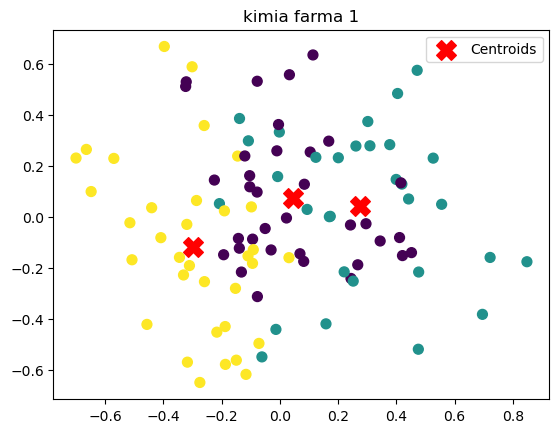

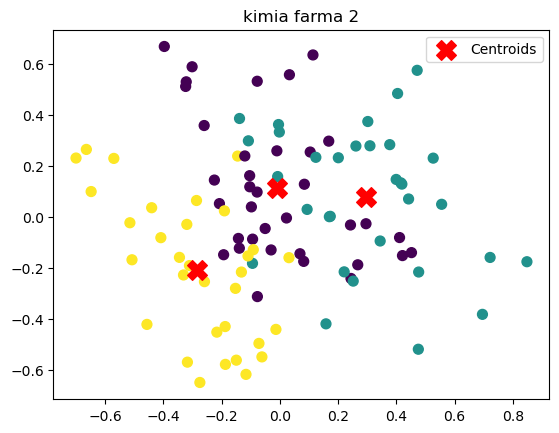

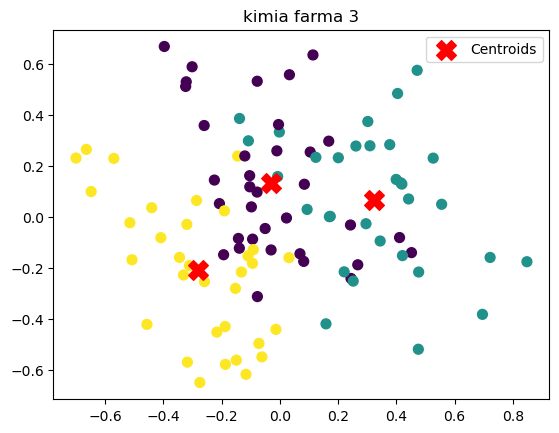

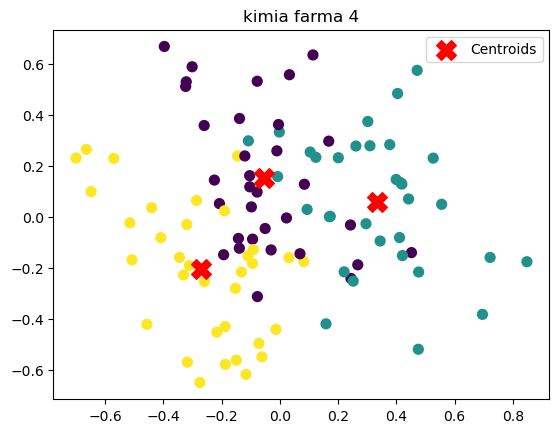

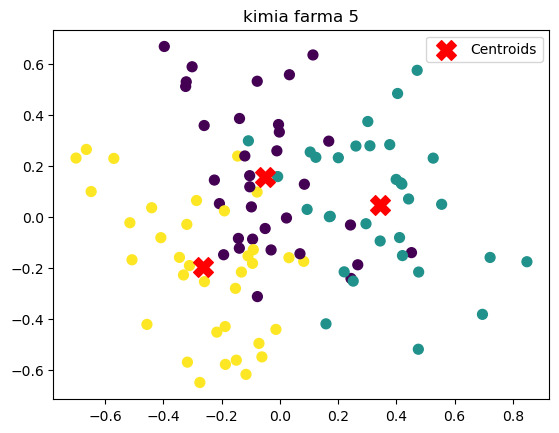

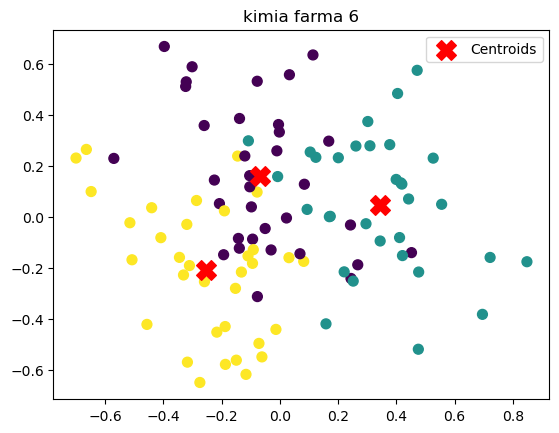

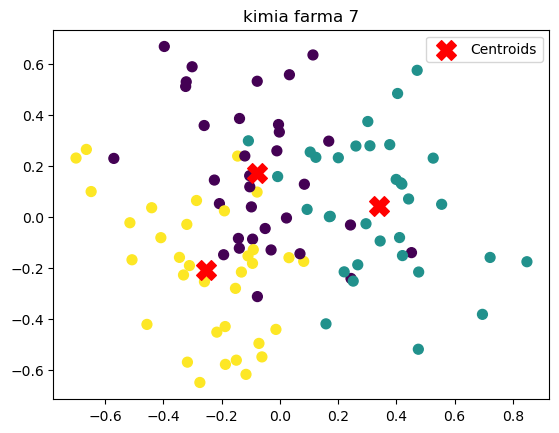

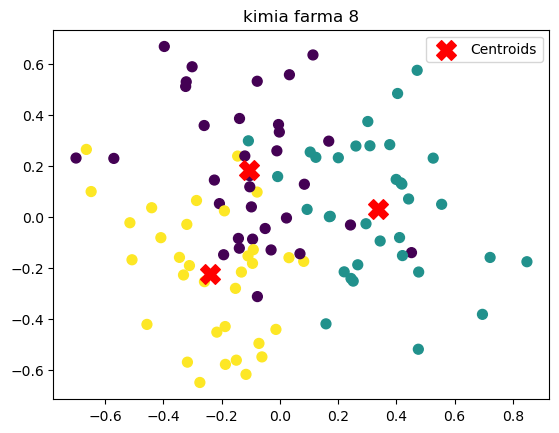

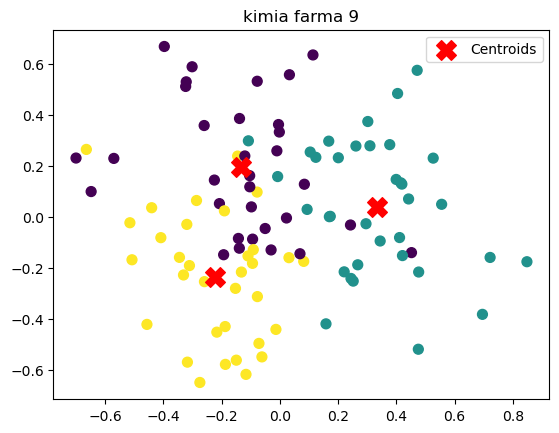

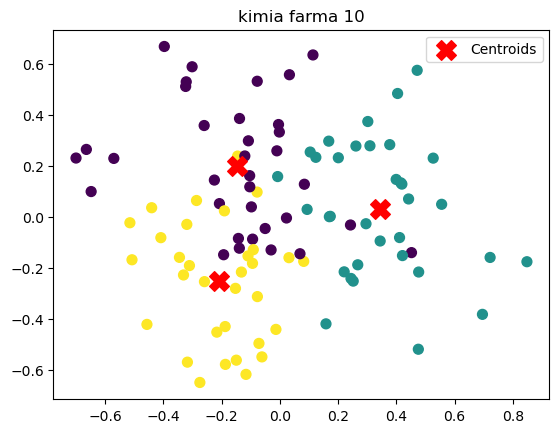

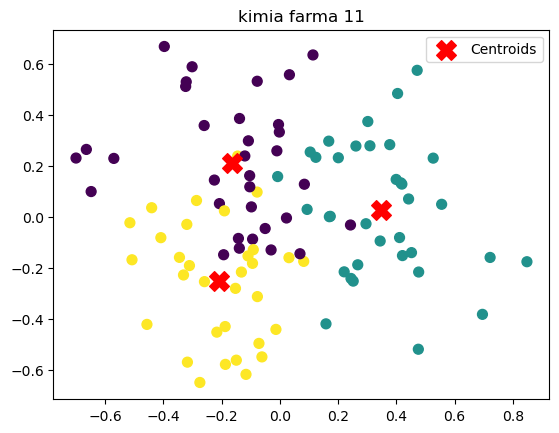

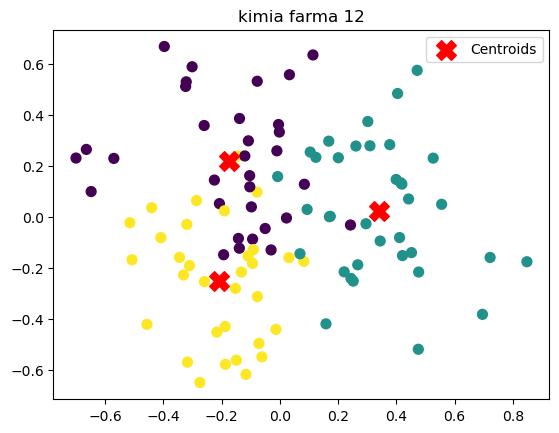

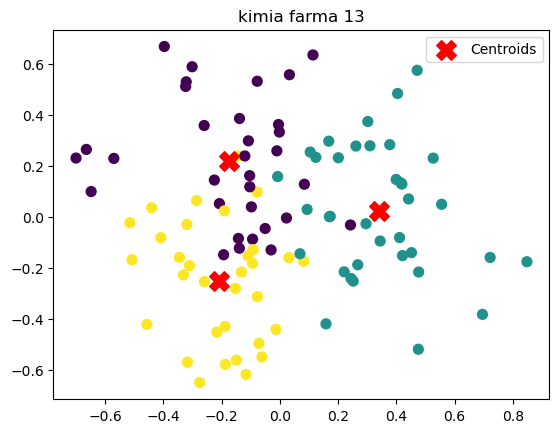

In [20]:
from sklearn.decomposition import PCA

# Fungsi plotting cluster
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids)  # Tidak perlu transpose
    plt.title(f'kimia farma {iteration}')
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.legend()
    plt.show()

# Parameter clustering
max_iterations = 465
k = 3

# Data simulasi
data = np.random.rand(100, 5)  # Data acak dengan 100 sampel dan 5 fitur

# Fungsi untuk random centroids
def random_centroids(data, k):
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

# Fungsi untuk mendapatkan label berdasarkan centroid
def get_labels(data, centroids):
    distances = np.linalg.norm(data[:, None] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Fungsi untuk menghitung centroid baru
def new_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

# Inisialisasi centroid
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()  # Menggunakan huruf "F" besar
iteration = 1

# Clustering loop
while iteration < max_iterations and (not old_centroids.equals(pd.DataFrame(centroids))):
    old_centroids = pd.DataFrame(centroids)
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_cluster(data, labels, centroids, iteration)
    iteration += 1


In [ ]:
# Penjelasan Machine learning

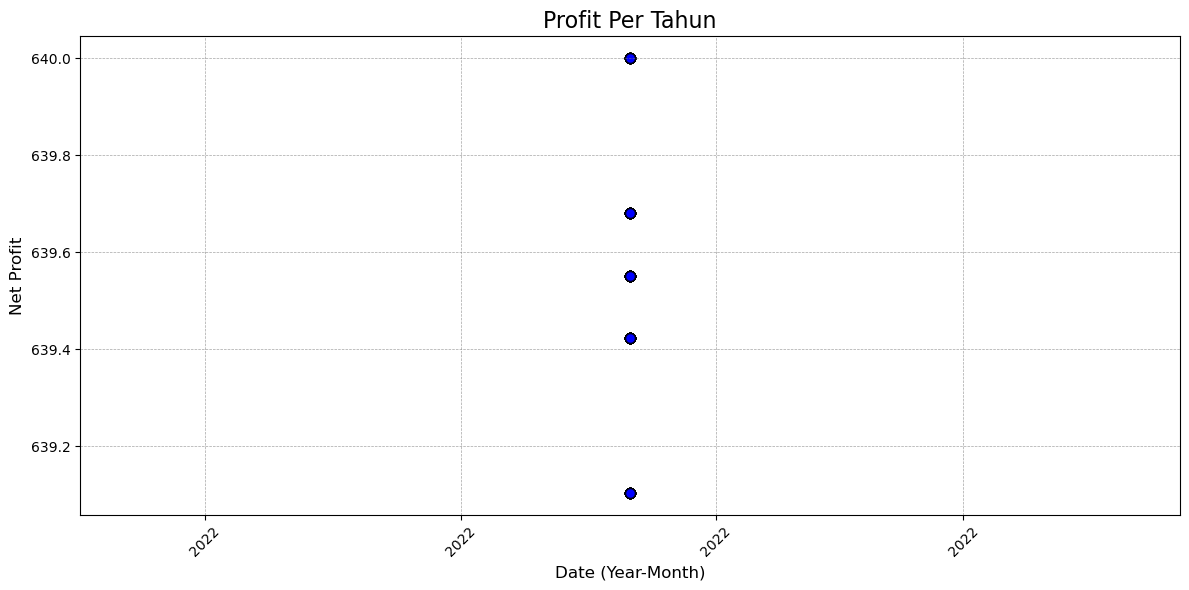

In [50]:
import matplotlib.dates as mdates

# Pastikan 'date' dalam format datetime jika belum
kf['date'] = pd.to_datetime(kf['date'])

# Membuat plot
plt.figure(figsize=(12, 6))  # Perbesar ukuran grafik
plt.scatter(kf['date'], kf['nett_profit'], c='blue', alpha=0.7, edgecolors='black', s=50)  # Tambahkan warna dan tepi

# Tambahkan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Format tanggal
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('2022'))  # Format tanggal Tahun-Bulan
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set label setiap 3 bulan
plt.xticks(rotation=45)  # Rotasi label tanggal agar lebih rapi

# Menambahkan label dan judul
plt.xlabel("Date (Year-Month)", fontsize=12)
plt.ylabel("Net Profit", fontsize=12)
plt.title("Profit Per Tahun", fontsize=16)

# Tampilkan plot
plt.tight_layout()
plt.show()


In [79]:
from sklearn.preprocessing import MinMaxScaler

# Pastikan kolom 'date' dalam format datetime
kf['date'] = pd.to_datetime(kf['date'])

# Ubah kolom 'date' ke format numerik (misalnya dalam bentuk timestamp)
kf['date_numeric'] = kf['date'].map(pd.Timestamp.timestamp)

# Siapkan data untuk scaling
x_train = kf[['date_numeric', 'nett_profit']].values

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan scaling
x_train_scaled = scaler.fit_transform(x_train)

print(x_train_scaled)

[[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]


In [81]:
x_train

array([[2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06, 6.40000e+02],
       [2.00000e-06,

In [83]:
# clustering
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 3)
kmean

KMeans(n_clusters=3)

In [85]:
y_cluster = kmean.fit_predict(x_train)

In [87]:
y_cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [91]:
kmean.cluster_centers_

array([[2.00000000e-06, 6.39545436e+02],
       [2.00000000e-06, 6.39104000e+02],
       [2.00000000e-06, 6.40000000e+02]])

In [99]:
# Machine learning Penjelasan

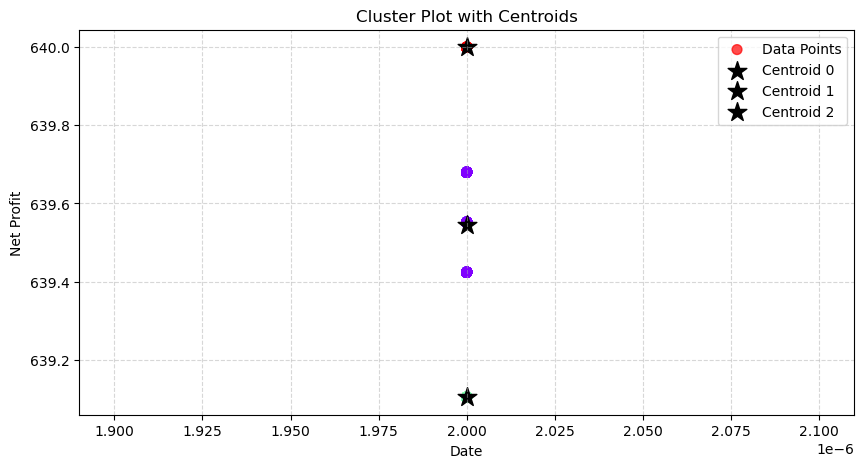

In [101]:
plt.figure(figsize=(10, 5))

# Scatter plot data
plt.scatter(x_train[:, 0], x_train[:, 1], c=kmean.labels_, cmap='rainbow', alpha=0.7, s=50, label='Data Points')

# Scatter plot centroids
for i in range(kmean.cluster_centers_.shape[0]):  # Iterasi setiap centroid
    plt.scatter(
        kmean.cluster_centers_[i, 0], 
        kmean.cluster_centers_[i, 1], 
        c='black', marker='*', s=200, label=f'Centroid {i}'
    )

# Tambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Net Profit')
plt.title('Cluster Plot with Centroids')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()


In [109]:
# Machine learning penjelasanan


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


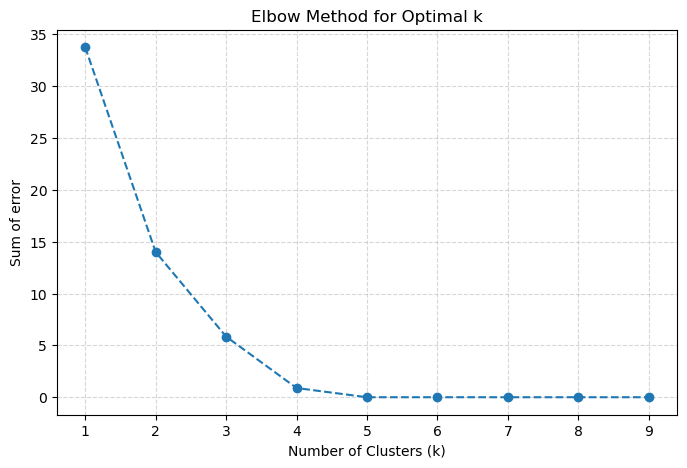

In [113]:
inertias = []
k_range = range(1, 10)

# Iterasi untuk berbagai nilai k
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42).fit(x_train)  # Perbaikan: n_clusters
    inertias.append(km.inertia_)  # Simpan inertia untuk tiap k

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of error')
plt.title('Elbow Method for Optimal k')
plt.grid(alpha=0.5, linestyle='--')
plt.show()